Using image data to classify whether a work of art is a lithograph or not.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import cv2 

# import matplotlib.pyplot as plt
# # from torchvision import datasets, transforms
from torch.utils.data import DataLoader
# import torch.nn as nn
# import torch.nn.functional as F
# import torch.optim as optim
import torch

import os

import seaborn as sns
sns.set(style="darkgrid")
from sklearn import preprocessing

import tensorflow as tf
# from tensorflow import image_dataset_from_directory
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
# Link to data on MoMA github
mydata_csv_url = 'https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artworks.csv'

In [4]:
# load the data from local host
df = pd.read_csv('../data/artworks.csv')

# remove NAs from medium column
df = df.dropna(subset=['Medium', "ThumbnailURL"])

In [5]:
# Create target column
lith_condition = df['Medium'].str.lower().str.contains('lithograph')
df['Target'] = lith_condition

In [6]:
df = df[['ObjectID', 'ThumbnailURL', 'Target']]
df.head()

,ObjectID,ThumbnailURL,Target
0,2,http://www.moma.org/media/W1siZiIsIjU5NDA1Il0s...,False
1,3,http://www.moma.org/media/W1siZiIsIjk3Il0sWyJw...,False
2,4,http://www.moma.org/media/W1siZiIsIjk4Il0sWyJw...,False
3,5,http://www.moma.org/media/W1siZiIsIjEyNCJdLFsi...,False
4,6,http://www.moma.org/media/W1siZiIsIjEyNiJdLFsi...,False


#### 100 images, 50 images of lithographs and 50 images of non lithographs (any other medium) were downloaded using the data_loader notebook. The title of each image is its Object ID and .jpg

In [7]:
#Uploading the images from local path

In [8]:
image_dir = os.path.join('../data/images/all')
image_dir

'../data/images/all'

In [9]:
image_names = os.listdir(image_dir)
print(image_names[:10])

['406.jpg', '4808.jpg', '4821.jpg', '4809.jpg', '413.jpg', '4799.jpg', '48.jpg', '798.jpg', '4822.jpg', '438.jpg']


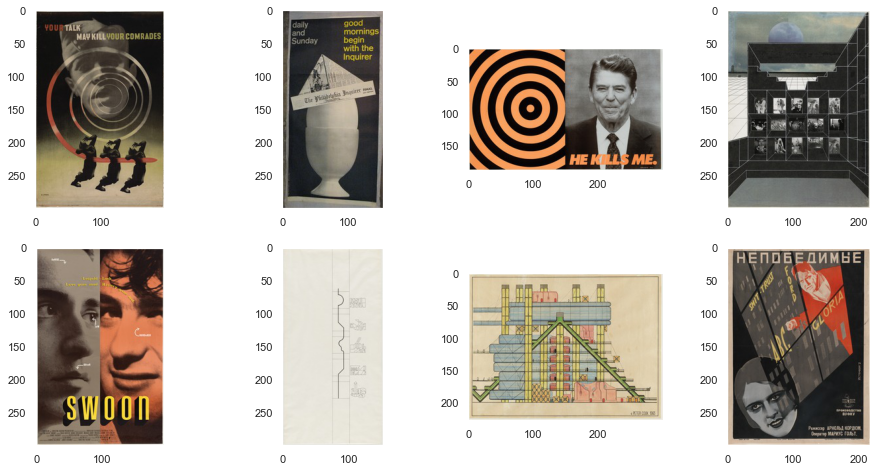

In [10]:

rows = 2
cols = 4
fig = plt.gcf()
fig.set_size_inches(cols * 4, rows * 4)



fig = plt.gcf()


pic_index = 1
pic_index += 8
next_image = [os.path.join(image_dir, fname) 
                for fname in image_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_image):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(rows, cols, i + 1, )
  plt.grid(False)

#   sp.axis('Off') # Don't show axes (or gridlines)


  img = mpimg.imread(img_path)

  plt.imshow(img)

plt.show()

In [11]:
# looking at one image shape
cv2.imread("../data/images/all/406.jpg").shape

(224, 300, 3)

In [13]:
# cv2.imread("../data/images/4808.jpg").shape

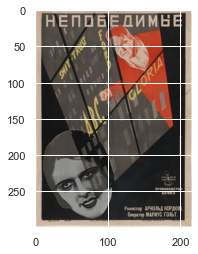

In [14]:
pic = plt.imshow(img)

pic

In [184]:
# img = image.load_img("../data/images/4822.jpg")
# img



In [15]:
def get_data():
    data_dir = os.path.join("../data/images/")
    
    transform = transforms.Compose([
        transforms.RandomResizedCrop(28),
        transforms.ToTensor()])

    train_set = datasets.ImageFolder(data_dir, transform=transform)

    train = DataLoader(train_set, batch_size=10, shuffle=True)



In [16]:
def train_imshow():
    dataiter = iter(train)
    images, labels = dataiter.next()
    fig, axes = plt.subplots(figsize=(10, 4), ncols=5)
    for i in range(5):
        ax = axes[i]
        ax.imshow(images[i].permute(1, 2, 0)) 
        ax.title.set_text(' '.join('%5s' % classes[labels[i]]))
    plt.show()

In [19]:
data =[]

for imagePath in image_dir:
    # load the image, resize the image to be 32x32 pixels
    # flatten the 32x32x3=3072 pixel image into a list, and store the image in the data list
    image1 = cv2.imread(imagePath)
    image1 = cv2.resize(image1, (28, 28)).flatten()
    data.append(image)
 

 # scale the raw pixel tp [0,1]
data = np.array(data, dtype="float") / 255.0

error: OpenCV(4.4.0) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-ucld1hvm/opencv/modules/imgproc/src/resize.cpp:3929: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [21]:
train = ImageDataGenerator(rescale=1/255)

In [24]:
train_dataset = train.flow_from_directory("../data/images/",
                                         target_size=(28,28,1),
                                         batch_size=5,
                                         class_mode="binary")

Found 100 images belonging to 1 classes.


In [25]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [26]:
from tensorflow.keras.layers import  Conv2D, MaxPooling2D, Flatten, Dense


model_cnn = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), 
           activation='relu', 
           input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='sigmoid')    
])

model_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               102528    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [230]:
# # Image is X, Target is y
# y = df['Target'].values
# X = train_dataset


In [27]:
model_cnn.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [28]:
history_cnn = model_cnn.fit(train_dataset, 
                            steps_per_epoch =3,
                            epochs=5)

ValueError: could not broadcast input array from shape (28,28,3) into shape (28,28,1,3)

#### Unsure how to definitively change the shape to what I want (28,28,1) 28x28 and black/white?

In [29]:
x_train_reshaped = train.reshape((train.shape[0], 28, 28, 1))

AttributeError: 'ImageDataGenerator' object has no attribute 'reshape'

In [30]:
train[0].shape

TypeError: 'ImageDataGenerator' object is not subscriptable

AttributeError: 'ImageDataGenerator' object has no attribute 'reshape'

In [ ]:
train = ImageDataGenerator(rescale=1/255)


In [58]:
train_dataset = train.flow_from_directory("../data/images/",
                                         target_size=(28,28),
                                         batch_size=10,
                                         class_mode="binary")

AttributeError: 'DataLoader' object has no attribute 'flow_from_directory'

In [75]:
x = image_names.load_data()

AttributeError: 'list' object has no attribute 'load_data'

In [36]:
train_data=ImageDataGenerator(
            rotation_range=45,
            width_shift_range=0.2,
            height_shift_range=0.2,
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
    fill_mode='nearest',
)

test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = test_datagen.flow_from_directory((image_dir),
target_size = (28, 28),
batch_size = 25,
class_mode = 'binary')

Found 0 images belonging to 0 classes.


In [24]:
# # Reshaping images!!!!!!!! 



from tensorflow.keras.preprocessing.image import ImageDataGenerator


# All images will be rescaled by 1./255
train_data = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_data.flow_from_directory(
        '../data/images',  # This is the source directory for training images
        target_size=(28, 28),  # All images will be resized to 200x200
        batch_size=120,
        # Use binary labels
        class_mode='binary')

train = DataLoader(image_dir, batch_size=32, shuffle=True)





# training_images = img_path.reshape((100,28,28,1))

# transform = transforms.Compose([
#             #transforms.RandomRotation(20),
#             transforms.RandomResizedCrop(128),
#             #transforms.RandomHorizontalFlip(),
#             transforms.ToTensor()])

# train_set = datasets.ImageFolder(data_dir, transform=transform)
    
    
# for img in image_dir:
#     img_array = cv2.imread(os.path.join(image_dir, img), cv2.IMREAD_GRAYSCALE)
#     plt.imshow(img_array, cmap="gray")
#     plt.show()

Found 0 images belonging to 0 classes.


In [167]:
model = tf.keras.models.Sequential([
  
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

training_history = model.fit(X, 
                             y, 
                             epochs=5,
                            validation_split=0.2)

ValueError: Error when checking input: expected flatten_3_input to have shape (28, 28) but got array with shape (216, 3)